In [1]:

#mass is in units of 10e10 M_solar
#distances are in kpc


#standard imports
import glob
from pygadgetreader import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

#setting matplotlib parameters
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [2]:
#set matplotlib global font size
matplotlib.rcParams['font.size']=14

In [3]:
#unpacking Amiga output

amiga_folder = '/home/ryan/projects/Medvedev/dm_sims/amiga_output/run_20201118/'

halos_files = glob.glob(amiga_folder + '*.AHF_halos')

halos = np.transpose(np.loadtxt(halos_files[0]))

r_virs = halos[9]
vmaxes = halos[10]


def make_cdf(quantity):
    
    q_bins = []
    q_count = []
    
    q_max = np.amax(quantity)
    q_min = np.amin(quantity)
    
    q = q_min
    
    while (q <= q_max):
        
        q_bins.append(q)
        q_in = len(quantity[quantity>q])
        q_count.append(q_in)
        
        q = np.power(q, 1.01)

    q_bins = np.array(q_bins)
    q_count = np.array(q_count)
    
    return q_bins, q_count

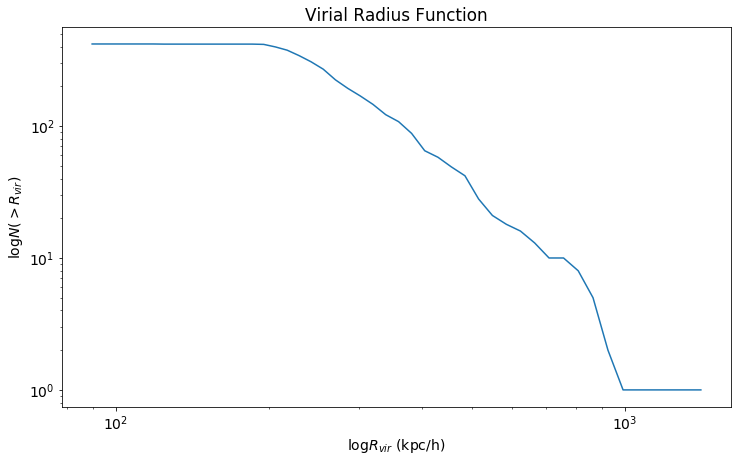

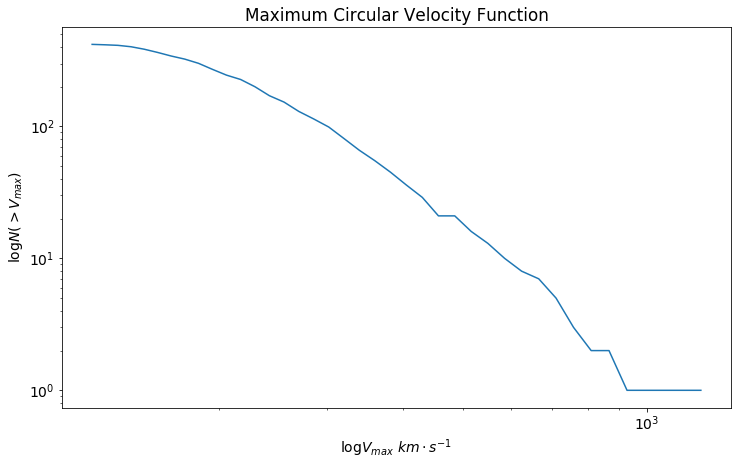

In [4]:
#plotting r_vir, and vcirc functions
rad_bins, rad_count = make_cdf(r_virs)

plt.figure(figsize=[12,7])
plt.loglog(rad_bins, rad_count)
plt.title('Virial Radius Function')
plt.xlabel('$\log R_{vir}$ (kpc/h)')
plt.ylabel('$\log N(>R_{vir})$')
#plt.savefig('r_vir_func.png')
plt.show()

vel_bins, vel_count = make_cdf(vmaxes)

plt.figure(figsize=[12,7])
plt.loglog(vel_bins, vel_count)
plt.title('Maximum Circular Velocity Function')
plt.xlabel('$\log V_{max}$ $km \cdot s^{-1}$')
plt.ylabel('$\log N(>V_{max})$')
#plt.savefig('v_max_func.png')
plt.show()

In [5]:
#extract halo CM positions
H_X = halos[2]
H_Y = halos[3]
H_Z = halos[4]

In [6]:
#convert from Amiga units to kpc, looks like I need to multiply by 1000
#don't believe the documentation saying units are kpc/h
#h = 0.67

H_x = H_X * 1000
H_y = H_Y * 1000
H_z = H_Z * 1000

hr_virs = r_virs

In [7]:
#reading in the data
snap_folder = '/home/ryan/projects/Medvedev/dm_sims/snaps/run_20201118/'
snap = snap_folder + 'snap_002'

readheader(snap, 'header')

{'npartThisFile': array([     0, 262144,      0,      0,      0,      0], dtype=uint32),
 'npartTotal': array([     0, 262144,      0,      0,      0,      0], dtype=uint32),
 'npartTotalHW': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'ngas': 0,
 'ndm': 262144,
 'ndisk': 0,
 'nbulge': 0,
 'nstar': 0,
 'nbndry': 0,
 'massTable': array([0.        , 4.10273037, 0.        , 0.        , 0.        ,
        0.        ]),
 'time': 0.9999999999999996,
 'nfiles': 1,
 'redshift': 4.440892098500626e-16,
 'boxsize': 50000.0,
 'O0': 0.31,
 'Ol': 0.69,
 'h': 0.67,
 'flag_cooling': 0,
 'flag_sfr': 0,
 'flag_fb': 0,
 'flag_fh2': 0,
 'flag_age': 0,
 'flag_metals': 0,
 'flag_potential': 0,
 'flag_delaytime': 0,
 'flag_tmax': 0,
 'rhocrit': 8.432254544043037e-30}

In [8]:
#extracting position and mass for all particles
#gas_pos = readsnap(snap, 'pos', 'gas')
#gas_mass = readsnap(snap, 'mass', 'gas')

dm_pos = readsnap(snap, 'pos', 'dm')
dm_mass = readsnap(snap, 'mass', 'dm')
dm_vel = readsnap(snap, 'velocity', 'dm')

Returning DM    Positions
Returning DM    Mass
Returning DM    Velocities


In [9]:
#extracting coordinates
#gas_x = gas_pos[:, 0]
#gas_y = gas_pos[:, 1]
#gas_z = gas_pos[:, 2]

dm_x = dm_pos[:, 0]
dm_y = dm_pos[:, 1]
dm_z = dm_pos[:, 2]

dm_vx = dm_vel[:, 0]
dm_vy = dm_vel[:, 1]
dm_vz = dm_vel[:, 2]

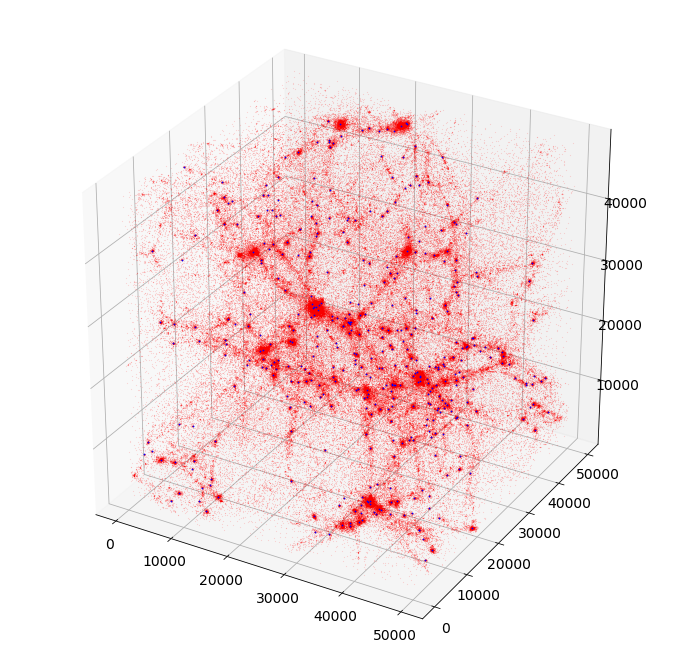

In [10]:
#plotting the positions

fig = plt.figure(figsize=[12,12])

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot3D(dm_x, dm_y, dm_z,'o', color='r',markersize=0.1, alpha=0.5)
ax.plot3D(H_x, H_y, H_z, 'o', color='b', markersize=0.75)
#plt.savefig('DM_positions_with_halos.png')
plt.show()
#ax.plot3D(gas_x, gas_y, gas_z, 'o', color='b', markersize=0.1, alpha=0.5)
#ax.set_xlim3d(-300, 300)
#ax.set_ylim3d(-300, 300)
#ax.set_zlim3d(-300, 300)

In [11]:
h_x = H_x[0]
h_y = H_y[0]
h_z = H_z[0]
halo_r = hr_virs[0]

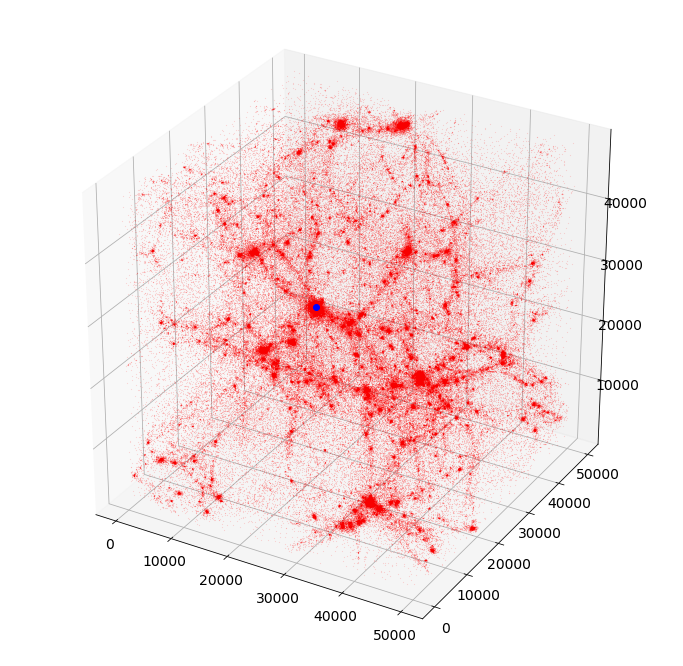

In [12]:
#plotting the halo

fig = plt.figure(figsize=[12,12])

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot3D(dm_x, dm_y, dm_z,'o', color='r',markersize=0.1, alpha=0.5)
ax.plot3D([h_x], [h_y], [h_z], 'o', color='b')

In [13]:
distance_from_h_cm = np.sqrt( np.power(dm_x - h_x, 2) + np.power(dm_y - h_y, 2) + np.power(dm_z - h_z, 2))

In [14]:
x_in = dm_x[distance_from_h_cm < halo_r]
y_in = dm_y[distance_from_h_cm < halo_r]
z_in = dm_z[distance_from_h_cm < halo_r]

vx_in = dm_vx[distance_from_h_cm < halo_r]
vy_in = dm_vy[distance_from_h_cm < halo_r]
vz_in = dm_vz[distance_from_h_cm < halo_r]

r_in = distance_from_h_cm[distance_from_h_cm < halo_r]

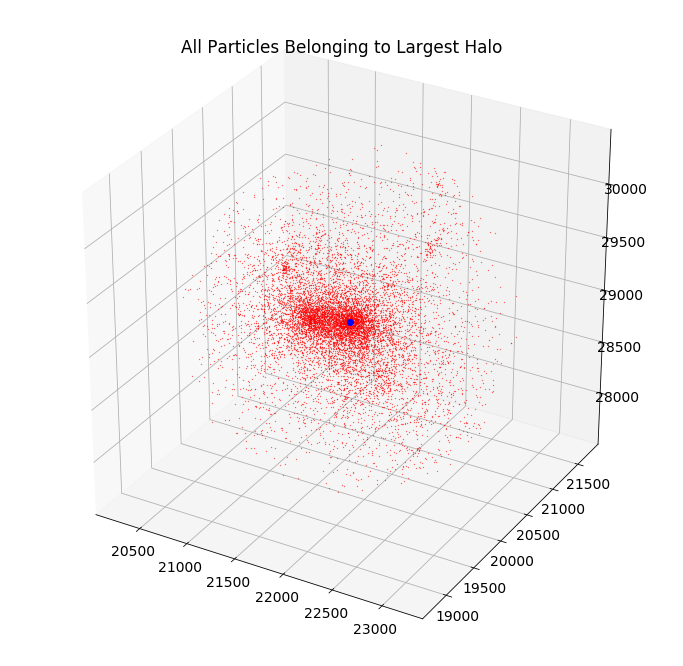

In [20]:
#plotting the positions

fig = plt.figure(figsize=[12,12])

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot3D(x_in, y_in, z_in,'o', color='r',markersize=0.25, alpha=1)
#ax.quiver(x_in, y_in, z_in, vx_in, vy_in, vz_in, length=100, normalize=True, alpha=1)
ax.plot3D([h_x], [h_y], [h_z], 'o', color='b')

plt.title('All Particles Belonging to Largest Halo')
#plt.savefig('halo_3d.png')
plt.show()

In [16]:
v_in = np.sqrt( np.power(vx_in,2) + np.power(vy_in,2) + np.power(vz_in,2) )

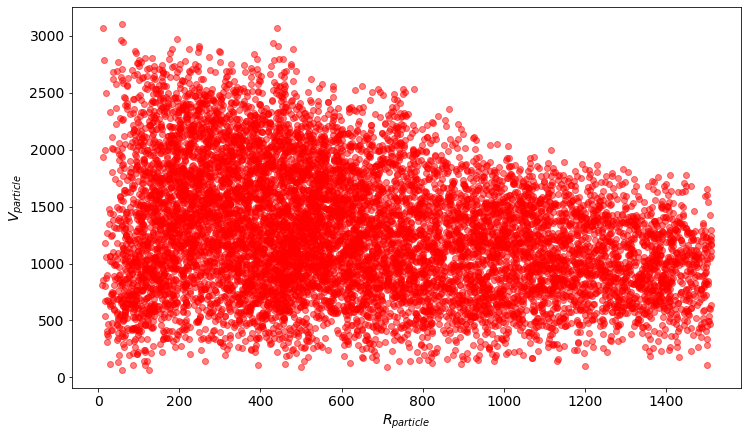

In [21]:
plt.figure(figsize=[12,7])

plt.plot(r_in, v_in, 'ro', alpha=0.5)
plt.ylabel('$V_{particle}$')
plt.xlabel('$R_{particle}$')
#plt.savefig('velocity_stuff.png')
plt.show()

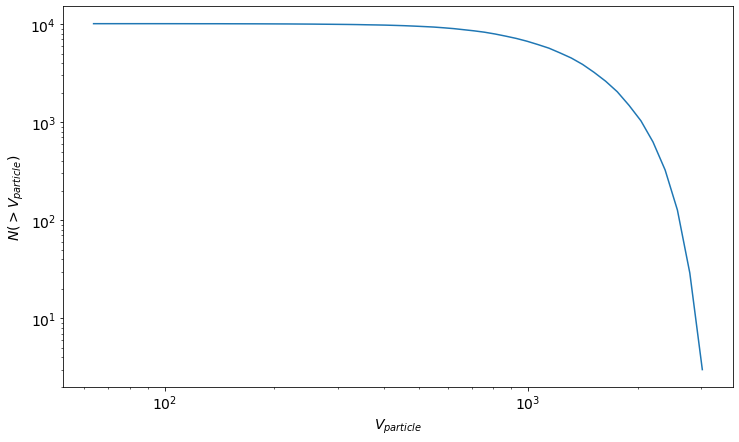

In [18]:
vel_bins, vel_count = make_cdf(v_in)

plt.figure(figsize=[12,7])

plt.loglog(vel_bins, vel_count)
plt.xlabel('$V_{particle}$')
plt.ylabel('$N(>V_{particle})$')
plt.show()